In [1]:
import requests
from bs4 import BeautifulSoup
from datetime import date, timedelta
import pandas as pd

In [2]:
url = "https://music.bugs.co.kr/chart/track/day/total?chartdate=20210511"

html = requests.get(url)
html

<Response [200]>

In [5]:
soup = BeautifulSoup(html.text, ('html.parser'))
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<!-- bgsweb-www903 -->
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="음악,음악 스트리밍,최신음악,인기가요,뮤직비디오,앨범,플레이어,mp3 다운로드,놀면뭐하니,유플래쉬,유플래시" name="keywords">
<script type="text/javascript">
	if(!(location.href.indexOf("music.bugs.co.kr/newPlayer") >= 0 || location.href.indexOf("music.bugs.co.kr/newRadio") >= 0 || location.href.indexOf("localhost") >= 0))
		document.domain = 'bugs.co.kr';

	var g_urlBase = "https://www.bugs.co.kr";
	var g_urlWww = "https://www.bugs.co.kr";
	var g_urlSecure = "https://secure.bugs.co.kr";
	var g_urlMusic = "https://music.bugs.co.kr";
	var g_urlMusicSecure = "https://music.bugs.co.kr";
	var g_urlMember = "https://secure.bugs.co.kr/member";
	var g_urlFile = "https://file.bugsm.co.kr/wbugs";
	var g_urlFile_n ="https://file.bugsm.co.kr/nbugs"; 
	//var g_urlSwf = "https://music.bugs.co.kr/swf";
	var g_urlSwf = "https://music.bugs.co.kr/swf";
	var g_urlJs = "/js";
	var g_urlMe = "http

In [19]:
title = soup.find_all('p', class_ = 'title')
title


AttributeError: ResultSet object has no attribute 'find_all'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

In [13]:
rank = soup.find_all('div', class_ = 'ranking')
rank
# rank[0].find('strong').text

'1'

In [15]:
artist =  soup.find_all('p', class_ = 'artist')
artist
# artist[0].find('a').text

'오마이걸(OH MY GIRL)'

In [22]:
url = "https://music.bugs.co.kr/chart/track/day/total?chartdate="
YY = int(input('기준 년도를 입력하세요(예:2020): '))
mm = int(input('기준 월을 입력하세요(예:7): '))
dd = int(input('기준 일을 입력하세요(예:3): '))
period = int(input('크롤링 하고자 하는 기간을 입력해 주세요: '))
start_date = date(YY,mm,dd)
timegap = timedelta(days=period)
start_date = start_date - timegap
start_date = start_date.strftime('%Y-%m-%d')
range_date = pd.date_range(start_date, periods = period, freq='D')

tlt_lst = []
dt_lst = []
art_lst = []
rnk_lst = []
for i in range_date:
    url = "https://music.bugs.co.kr/chart/track/day/total?chartdate="
    html = requests.get(url+i.strftime('%Y%m%d'))
    soup = BeautifulSoup(html.text, 'html.parser')
    
    title = soup.find_all('p', class_ = 'title')
    rank = soup.find_all('div', class_ = 'ranking')
    artist =  soup.find_all('p', class_ = 'artist')
    
    for num in range(len(title)):
        rnk = rank[num].find('strong').text
        rnk_lst.append(rnk)
        try:
            tlt = title[num].find('a').text
            tlt_lst.append(tlt)
        except AttributeError:
            tlt = title[num].find('span')[1].text
            tlt_lst.append(tlt)
        try:
            art = artist[num].find('a').text
            art_lst.append(art)
        except AttributeError:
            art = artist[num].find('span').text
            art_lst.append(art)
        dt_lst.append(i.strftime('%Y-%m-%d'))

music_df = pd.DataFrame({'date':dt_lst,
                         'rank':rnk_lst,
                         'name':tlt_lst,
                         'artist':art_lst})
music_df['rank'] = music_df['rank'].astype(int)
                         
music_df.to_csv('c:/py_data/벅스뮤직 순위 크롤링.csv')                         
    
    
    
    

기준 년도를 입력하세요(예:2020): 2021
기준 월을 입력하세요(예:7): 3
기준 일을 입력하세요(예:3): 31
크롤링 하고자 하는 기간을 입력해 주세요: 150


In [23]:
# pivot 파일 중복제거
music_pivot = pd.pivot_table(music_df,
                             index=['date'],
                             columns = ['name'],
                             values = ['rank'])
music_pivot

rank                                                             \
name       0415 12:45 (Stripped)  2002 2020년 11월 어느 가을밤 2021 2easy(ft.헤이즈)   
date                                                                         
2020-11-01  NaN             60.0  76.0              NaN  NaN           NaN   
2020-11-02  NaN             61.0  84.0              NaN  NaN           NaN   
2020-11-03  NaN             64.0  78.0              NaN  NaN           NaN   
2020-11-04  NaN             59.0  80.0              NaN  NaN           NaN   
2020-11-05  NaN             69.0  78.0              NaN  NaN           NaN   
...         ...              ...   ...              ...  ...           ...   
2021-03-26  NaN             78.0  68.0              NaN  NaN           NaN   
2021-03-27  NaN             78.0  64.0              NaN  NaN           NaN   
2021-03-28  NaN             71.0  73.0              NaN  NaN           NaN   
2021-03-29  NaN             70.0  75.0              NaN  NaN           NaN   
2021-03-30  NaN             64.0  70.0              NaN  NaN           NaN   

                                                       ...                  \
name        3!4! 34+35 4 Memory 5시 53분의 하늘에서 발견한 너와 나  ... 회룡포   후 훨훨훨 휘파람   
date                                                   ...                   
2020-11-01   NaN  26.0      NaN                  67.0  ... NaN NaN NaN NaN   
2020-11-02   NaN  32.0      NaN                  74.0  ... NaN NaN NaN NaN   
2020-11-03   NaN  38.0      NaN                  77.0  ... NaN NaN NaN NaN   
2020-11-04   NaN  38.0      NaN                  92.0  ... NaN NaN NaN NaN   
2020-11-05   NaN  38.0      NaN                  81.0  ... NaN NaN NaN NaN   
...          ...   ...      ...                   ...  ...  ..  ..  ..  ..   
2021-03-26  52.0  76.0      NaN                   NaN  ... NaN NaN NaN NaN   
2021-03-27  86.0  79.0      NaN                   NaN  ... NaN NaN NaN NaN   
2021-03-28   NaN  89.0      NaN                   NaN  ... NaN NaN NaN NaN   
2021-03-29   NaN   NaN      NaN                   NaN  ... NaN NaN NaN NaN   
2021-03-30   NaN  86.0      NaN                   NaN  ... NaN NaN NaN NaN   

                                                                              \
name        휴지 흑백사진 (2021) (바른연애 길잡이 X KCM) 흔들리는 꽃들 속에서 네 샴푸향이 느껴진거야  흔적 히어로   
date                                                                           
2020-11-01 NaN                          NaN                     16.0 NaN NaN   
2020-11-02 NaN                          NaN                     17.0 NaN NaN   
2020-11-03 NaN                          NaN                     20.0 NaN NaN   
2020-11-04 NaN                          NaN                     21.0 NaN NaN   
2020-11-05 NaN                          NaN                     23.0 NaN NaN   
...         ..                          ...                      ...  ..  ..   
2021-03-26 NaN                          NaN                     35.0 NaN NaN   
2021-03-27 NaN                          NaN                     34.0 NaN NaN   
2021-03-28 NaN                          NaN                     38.0 NaN NaN   
2021-03-29 NaN                          NaN                     49.0 NaN NaN   
2021-03-30 NaN                          NaN                     37.0 NaN NaN   

                         
name       힘든 건 사랑이 아니다  
date                     
2020-11-01          8.0  
2020-11-02          8.0  
2020-11-03          9.0  
2020-11-04         12.0  
2020-11-05         13.0  
...                 ...  
2021-03-26          NaN  
2021-03-27          NaN  
2021-03-28          NaN  
2021-03-29          NaN  
2021-03-30          NaN  

[150 rows x 828 columns]

In [24]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fl = fm.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font',family=fl)

In [25]:
target_col = [('rank','METEOR'),('rank','아로하'),('rank','벚꽃 엔딩')]

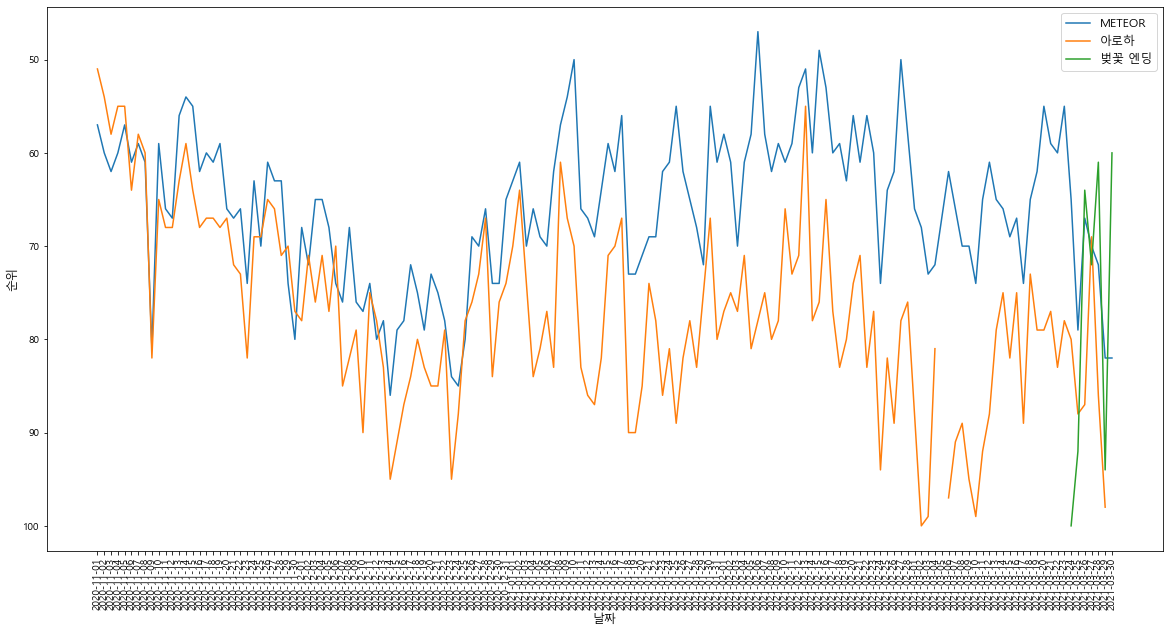

In [31]:
plt.figure(figsize=(20,10))
plt.plot(music_pivot[target_col])
plt.legend(target_col, loc='best')
plt.gca().invert_yaxis() # y축 값 뒤집기
plt.xticks(rotation=90) # x축 텍스트 90도 회전
plt.xlabel("날짜",fontsize = 12)
plt.ylabel("순위",fontsize = 12)
plt.legend(['METEOR','아로하','벚꽃 엔딩'],fontsize = 12)